# Politics vs Climate Research

## Initialization of data

In [1]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [2]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [3]:
config = ConfigLoader.get_config()

In [4]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [5]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [6]:
from simple_statistics import yearwise_documents
from plot_utils import simple_bar_histogram, multi_bar_histogram

def show_histogram_for_topics(topics=[], normalize_by_year=True, normalize=False, corpus_lengths=[877973, 407961, 221034], y_scale="linear"):
    if normalize_by_year:
        print('chart is normalized by documents per year!')
    
    mult_years = []
    mult_counts = []
    filtered_corpora = []
    for corpus in corpora:
        
        if normalize_by_year:
            all_years_counts = {}
            all_years, all_counts = yearwise_documents(corpus)
            for i in range(len(all_years)):
                all_years_counts[all_years[i]] = all_counts[i]
        
        corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=topics)
        filtered_corpora.append(corpus)
        
        years, counts = yearwise_documents(corpus)
        mult_years.append(years)
        
        if normalize_by_year:
            normalized_counts = []
            for i, c in enumerate(counts):
                normalized_counts.append(c/all_years_counts[years[i]])
            mult_counts.append(normalized_counts)
        else:
            mult_counts.append(counts)
    multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=normalize, corpus_lengths=corpus_lengths, y_scale=y_scale)
    
def show_bundestag_histogram_for_topics(topics=[], y_scale="linear"):
    corpus = CorpusFilter.filter(corpus=corpora[0], text_contains_one_of=topics)
    years, counts = yearwise_documents(corpus)
    simple_bar_histogram(years, counts, y_scale=y_scale)

## Histograms about topics

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:05<00:00, 37625.74it/s]


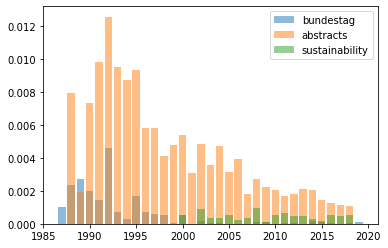

In [7]:
show_histogram_for_topics(["fckw", "cfc"], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:08<00:00, 25537.03it/s]


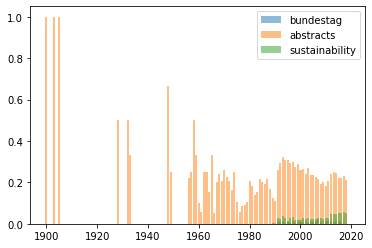

In [8]:
show_histogram_for_topics(["kohlenstoffdioxid", "carbon dioxide", "co2"], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:11<00:00, 18844.17it/s]


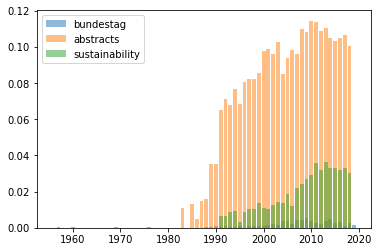

In [9]:
show_histogram_for_topics(["greenhouse gas", "ghg", "treibhausgas", "thg"], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:11<00:00, 19445.65it/s]


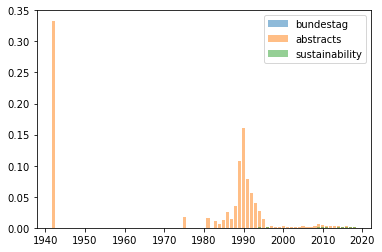

In [10]:
show_histogram_for_topics(["global warming", "globale erwärmung", "globale erwaermung", "globale erwaermung"], y_scale="linear")

Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 877973/877973 [00:13<00:00, 67163.26it/s]


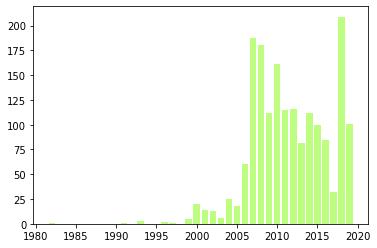

In [11]:
show_bundestag_histogram_for_topics(["klimawandel"], y_scale="linear")

## Histograms about technologies

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:11<00:00, 20028.50it/s]


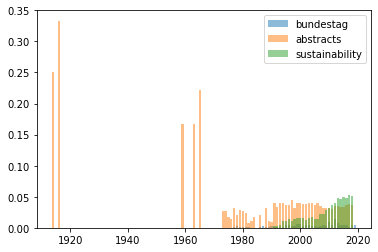

In [12]:
show_histogram_for_topics(["solar", "photovoltaic", "photovoltaik", " pv "], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:06<00:00, 32258.88it/s]


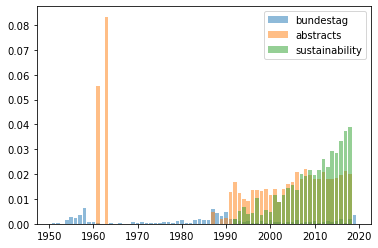

In [13]:
show_histogram_for_topics(["hydrogen", "wasserstoff", " h2 "], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:17<00:00, 12793.67it/s]


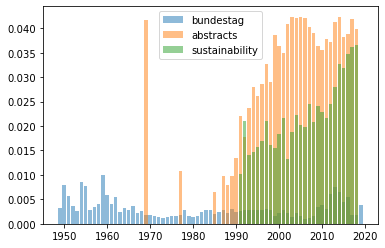

In [14]:
show_histogram_for_topics(["fracturing", "hydrofracking", "fraccing", "fracing", "frac", "fracking"], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:12<00:00, 18020.01it/s]


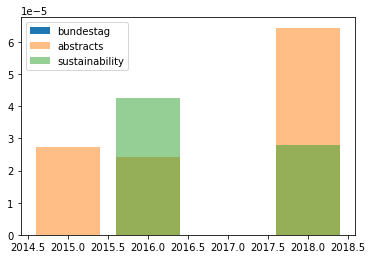

In [15]:
show_histogram_for_topics(["negative emissions", "negative emissions technology", "negativ emission", "negative-emission"], y_scale="linear")

## Keyword matching

In [ ]:
# extract keywords from documents in corpus and assign keywords to documents
sampled_corpora = [corpus.sample(1, seed=42) for corpus in filtered_corpora]

In [ ]:
for corpus in sampled_corpora:
    KeyPhraseExtractor.rake(corpus=corpus)

In [ ]:
import re
def remove_punctuation(corpus: Corpus):
    for d in corpus.get_documents():
        res = re.sub(r'[^a-zA-ZäöüÖÄÜß\-\s\.!\?]', '', d.text)
        res = re.sub(r' +', ' ', res)
        d.text = res
    

remove_punctuation(sampled_corpora[0])

In [ ]:
for corpus in sampled_corpora[:]:
    corpus.translate_keywords(kwt, restrict_per_document=10)

# sampled_corpora[2].get_documents()[0].keywords

In [ ]:
for corpus in sampled_corpora[:]:
    print(corpus.translate_keywords(kwt, restrict_per_document=1))

# sampled_corpora[2].get_documents()[0].keywords

In [ ]:
sampled_corpora[0].get_documents()[0].keywords

In [ ]:
from utils import KeywordMatcher
KeywordMatcher.match_corpora(sampled_corpora[0], sampled_corpora[1])

In [ ]:
kwt = KeywordTranslator()
for corpus in sampled_corpora:
    for d in corpus.get_documents():
        print(d.text[:100], '...\n  keywords:')
        for kw in d.keywords:
            print('    - \"'+str(kw)+'\"')
        print('\n')

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))